In [1]:
# act with SARSA and Q learning on taxi and blackjack environment

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import sys
import time
from IPython.display import display, clear_output
from tqdm.auto import tqdm

from utils import MDPEnv, ReturnTracker, TDZeroControl, TupleEnvWrapper

%config InlineBackend.figure_formats = ['svg']

# SARSA/Q-learning on our MDP

In [3]:
env = MDPEnv()

In [4]:
nmbr_episodes = 300

optimal_actions = [[],[]]
for j, off_policy in enumerate([False, True]):
    print('Off-policy: {}'.format(off_policy))
    agent = TDZeroControl(env, lr=1e-2, gamma=.9, epsilon=.2, off_policy=off_policy)
    for i, episodes in enumerate(np.ones(nmbr_episodes, dtype=int)):
        agent.learn(episodes, 100, verb=False)
        optimal_actions[j].append(np.mean(np.argmax(agent.Q_values, axis=-1) == np.array([1., 0., 1.])))
    print('Q values: ', agent.Q_values)
    print('Optimal values: ', np.argmax(agent.Q_values, axis=-1))

Off-policy: False
Q values:  [[2.9747852  2.99390042]
 [6.47633313 5.44139298]
 [3.01028298 3.29134507]]
Optimal values:  [1 0 1]
Off-policy: True
Q values:  [[3.66272893 3.84099088]
 [7.26326331 6.4131477 ]
 [3.67659097 4.25772408]]
Optimal values:  [1 0 1]


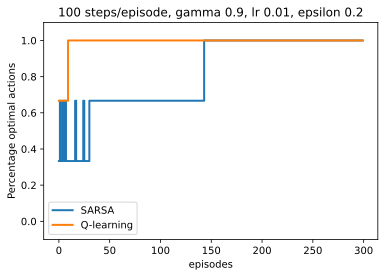

In [5]:
plt.step(np.arange(nmbr_episodes), optimal_actions[0], label='SARSA', linewidth=2)
plt.step(np.arange(nmbr_episodes), optimal_actions[1], label='Q-learning', linewidth=2)
plt.ylim(-.1,1.1)
plt.ylabel('Percentage optimal actions')
plt.xlabel('episodes')
plt.title('100 steps/episode, gamma {}, lr {}, epsilon {}'.format(agent.gamma, agent.lr, agent.epsilon))
plt.legend()
plt.show()

# TD(0) control the taxi environment

In [2]:
env = gym.make("Taxi-v3", render_mode='ansi').env

In [3]:
observation, info = env.reset()

In [4]:
agent = TDZeroControl(env, lr=.1, gamma=.6, epsilon=.1, off_policy=True)

In [5]:
tracker = ReturnTracker()

In [6]:
agent.learn(episodes=10000,
            max_steps=None, 
            # exploration_scheme = {'max_epsilon': .9, 'min_epsilon': 0.01, 'decay_rate': 0.01},
            tracker=tracker)

  0%|          | 0/10000 [00:00<?, ?it/s]

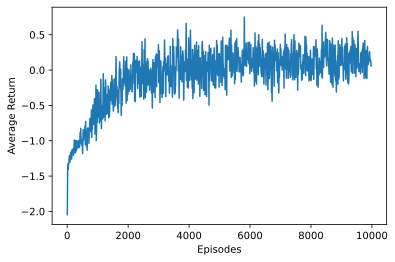

In [7]:
tracker.plot(smooth=10)

In [8]:
# test

while True:
    
    terminated, truncated = False, False
    
    state, info = env.reset()
    
    steps = 0
    returns = 0
    
    while not terminated and not truncated:

        time.sleep(.2)
        clear_output(wait=True)

        action = agent.predict(state)
        new_state, reward, terminated, truncated, info = env.step(action)
        agent.update(state, action, reward, new_state)
        steps += 1
        state = new_state
        returns += reward
        
        print('steps: {}, returns: {}'.format(steps, returns))

        print(env.render())
    
        sys.stdout.flush()
        
        if steps > 40:
            break
    
    time.sleep(1.5)

steps: 10, returns: 11
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



KeyboardInterrupt: 

# TO(0) control the black jack environment

In [28]:
env = TupleEnvWrapper(gym.make("Blackjack-v1", render_mode='rgb_array').env)

In [29]:
for _ in range(10):

    terminated, truncated = False, False
    state, info = env.reset()

    while not terminated and not truncated:
        action = env.action_space.sample()
        new_state, reward, terminated, truncated, info = env.step(action)
        print(new_state, reward, terminated, truncated, info)
        state = new_state
    

178 -1.0 True False {}
483 1.0 True False {}
652 -1.0 True False {}
294 -1.0 True False {}
348 -1.0 True False {}
548 -1.0 True False {}
254 1.0 True False {}
218 -1.0 True False {}
398 -1.0 True False {}
483 1.0 True False {}


In [30]:
observation, info = env.reset()



In [31]:
agent = TDZeroControl(env, lr=.01, gamma=.99, epsilon=.05, off_policy=True)



In [32]:
tracker = ReturnTracker()



In [37]:
agent.learn(episodes=100_000,
            max_steps=50, 
            tracker=tracker)



  0%|          | 0/100000 [00:00<?, ?it/s]

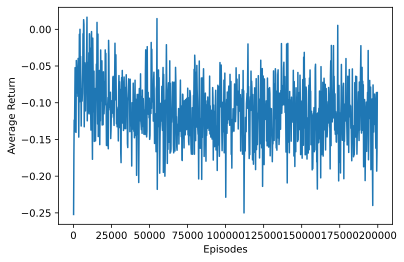

In [41]:
tracker.plot(smooth=200)

In [42]:
# test 

for episode in range(5):
    # Reset the environment and get the initial state
    state, info = env.reset()
    terminated, truncated = False, False
    print(f"EPISODE {episode+1} \n")

    # Loop through the game until it's finished
    while not terminated and not truncated:
        print(f"State: {env.observation_space.decode(state)}")
        # Choose an action
        action = agent.predict(state)
        
        print(f"Action: {action}")

        # Take the action and observe the result
        new_state, reward, terminated, truncated, info = env.step(action)
        
        print(f"New State: {env.observation_space.decode(new_state)}")
        
        state = new_state

        print(f"Reward: {reward}")
        print("\n")
    print("\n")

EPISODE 1 

State: [10.  9.  0.]
Action: 1
New State: [14.  9.  0.]
Reward: 0.0


State: [14.  9.  0.]
Action: 1
New State: [18.  9.  0.]
Reward: 0.0


State: [18.  9.  0.]
Action: 1
New State: [28.  9.  0.]
Reward: -1.0




EPISODE 2 

State: [14.  3.  1.]
Action: 1
New State: [17.  3.  1.]
Reward: 0.0


State: [17.  3.  1.]
Action: 1
New State: [15.  3.  0.]
Reward: 0.0


State: [15.  3.  0.]
Action: 1
New State: [25.  3.  0.]
Reward: -1.0




EPISODE 3 

State: [12.  3.  0.]
Action: 1
New State: [13.  3.  0.]
Reward: 0.0


State: [13.  3.  0.]
Action: 1
New State: [14.  3.  0.]
Reward: 0.0


State: [14.  3.  0.]
Action: 1
New State: [16.  3.  0.]
Reward: 0.0


State: [16.  3.  0.]
Action: 1
New State: [26.  3.  0.]
Reward: -1.0




EPISODE 4 

State: [14.  2.  0.]
Action: 1
New State: [21.  2.  0.]
Reward: 0.0


State: [21.  2.  0.]
Action: 0
New State: [21.  2.  0.]
Reward: 1.0




EPISODE 5 

State: [16.  5.  0.]
Action: 1
New State: [21.  5.  0.]
Reward: 0.0


State: [21.  5.  0.

dark = stick, light = hit


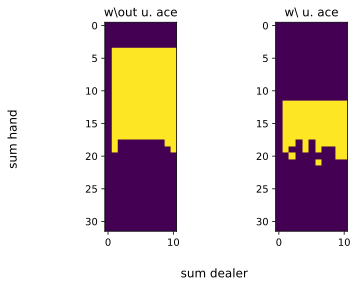

dark = stick, light = hit


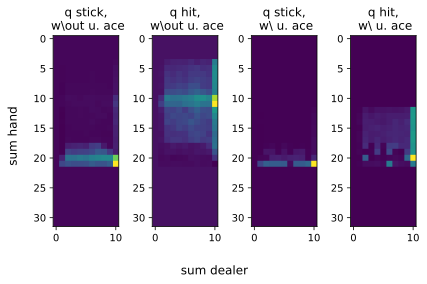

In [43]:
optimal_actions = np.zeros(tuple(env.observation_space.all_n))
Q_values_decoded = np.zeros((32,11,2,2))
for i in range(optimal_actions.shape[0]):
    for j in range(optimal_actions.shape[1]):
        for k in range(optimal_actions.shape[2]):
            optimal_actions[i,j,k] = np.argmax(agent.Q_values[env.observation_space.encode((i, j, k))])
            Q_values_decoded[i,j,k] = agent.Q_values[env.observation_space.encode((i, j, k))]

fig,axes = plt.subplots(1,2)
axes[0].imshow(optimal_actions[:,:,0])
axes[0].set_title('w\out u. ace')
axes[1].imshow(optimal_actions[:,:,1])
axes[1].set_title('w\ u. ace')
fig.supylabel('sum hand')
fig.supxlabel('sum dealer')
plt.tight_layout()
print('dark = stick, light = hit')
plt.show()

fig,axes = plt.subplots(1,4)
axes[0].imshow(Q_values_decoded[:,:,0,0])
axes[0].set_title('q stick,\n w\out u. ace')
axes[1].imshow(Q_values_decoded[:,:,0,1])
axes[1].set_title('q hit,\n w\out u. ace')
axes[2].imshow(Q_values_decoded[:,:,1,0])
axes[2].set_title('q stick,\n w\ u. ace')
axes[3].imshow(Q_values_decoded[:,:,1,1])
axes[3].set_title('q hit,\n w\ u. ace')
fig.supylabel('sum hand')
fig.supxlabel('sum dealer')
plt.tight_layout()
print('dark = stick, light = hit')
plt.show()